In [328]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc

In [329]:
df = pd.read_csv('framingham_heart_disease.csv')
print(df.shape)
print(df['TenYearCHD'].unique())
df

(4238, 16)
[0 1]


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [330]:
df['TenYearCHD'].value_counts() # Conjunto de dados desbalanceados

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [331]:
df.info()
# Valores nulos nas colunas: education | cigsPerDay | BPMeds | totChol | BMI | heartRate | glucose

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


<Axes: >

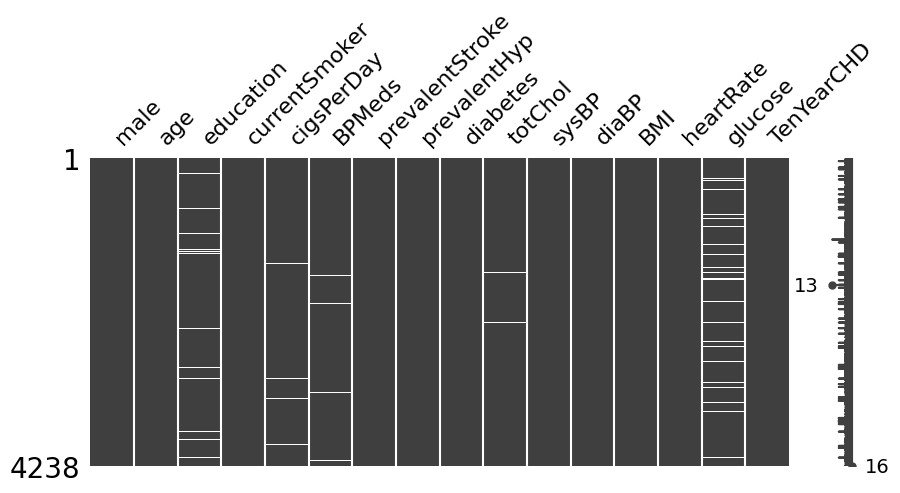

In [332]:
msno.matrix(df, figsize = (10, 4))

<Axes: >

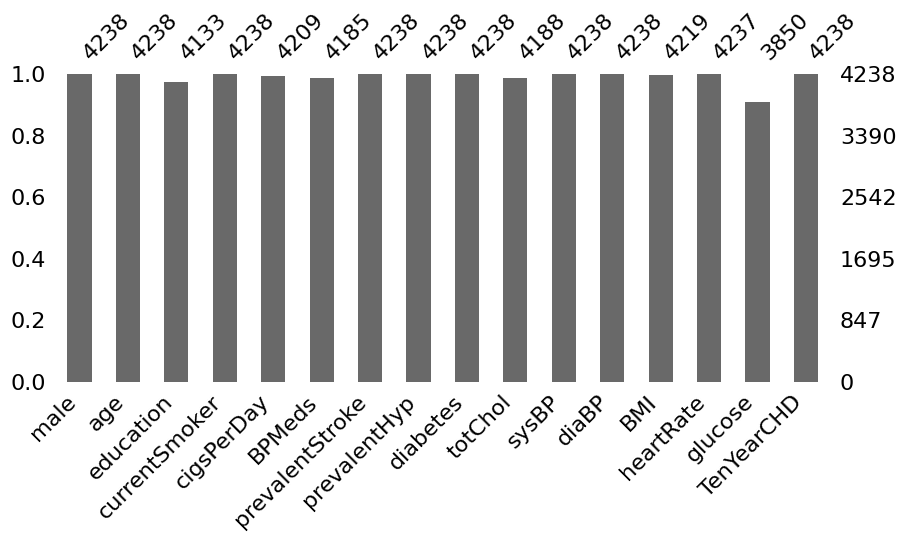

In [333]:
msno.bar(df, figsize = (10, 4))

In [334]:
print(df.isna().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [335]:
df_nan = df[(df['heartRate'].isna())]
df_nan

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
689,1,64,1.0,1,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,NaN,91.0,1


In [336]:
media_heartRate = df[(df['TenYearCHD'] == 1) & (df['male'] == 1) & (df['currentSmoker'] == 1) & (df['prevalentStroke'] == 0) & (df['prevalentHyp'] == 1) & (df['diabetes'] == 0)]
media_heartRate = (media_heartRate['heartRate'].mean()).round(1)
media_heartRate

np.float64(80.1)

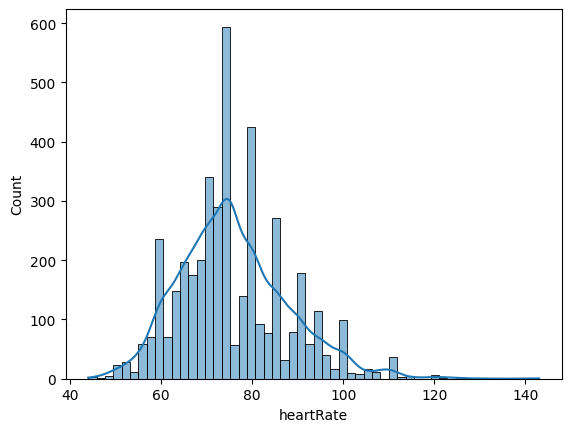

In [337]:
sns.histplot(df, x = 'heartRate', kde = True);

In [338]:
df.at[df.index[689], 'heartRate'] =  media_heartRate
df[df.index == 689]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
689,1,64,1.0,1,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,80.1,91.0,1


In [339]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [340]:
df_glucose = df[(df['glucose'].isna())]
df_glucose

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
42,0,52,1.0,0,0.0,1.0,0,1,0,NaN,148.0,92.0,25.09,70.0,NaN,1
54,0,39,2.0,1,20.0,0.0,0,0,0,209.0,115.0,75.0,22.54,90.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170,0,41,2.0,1,5.0,0.0,0,0,0,205.0,105.0,74.0,20.85,87.0,NaN,0
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0


In [341]:
media_diabete1_chd1 = df[(df['diabetes'] == 1) & (df['TenYearCHD'] == 1)]
media_diabete0_chd0 = df[(df['diabetes'] == 0) & (df['TenYearCHD'] == 0)]
media_diabete1_chd0 = df[(df['diabetes'] == 1) & (df['TenYearCHD'] == 0)]
media_diabete0_chd1 = df[(df['diabetes'] == 0) & (df['TenYearCHD'] == 1)]
print(media_diabete0_chd1.shape, media_diabete1_chd1.shape, media_diabete0_chd0.shape, media_diabete1_chd0.shape)

(604, 16) (40, 16) (3525, 16) (69, 16)


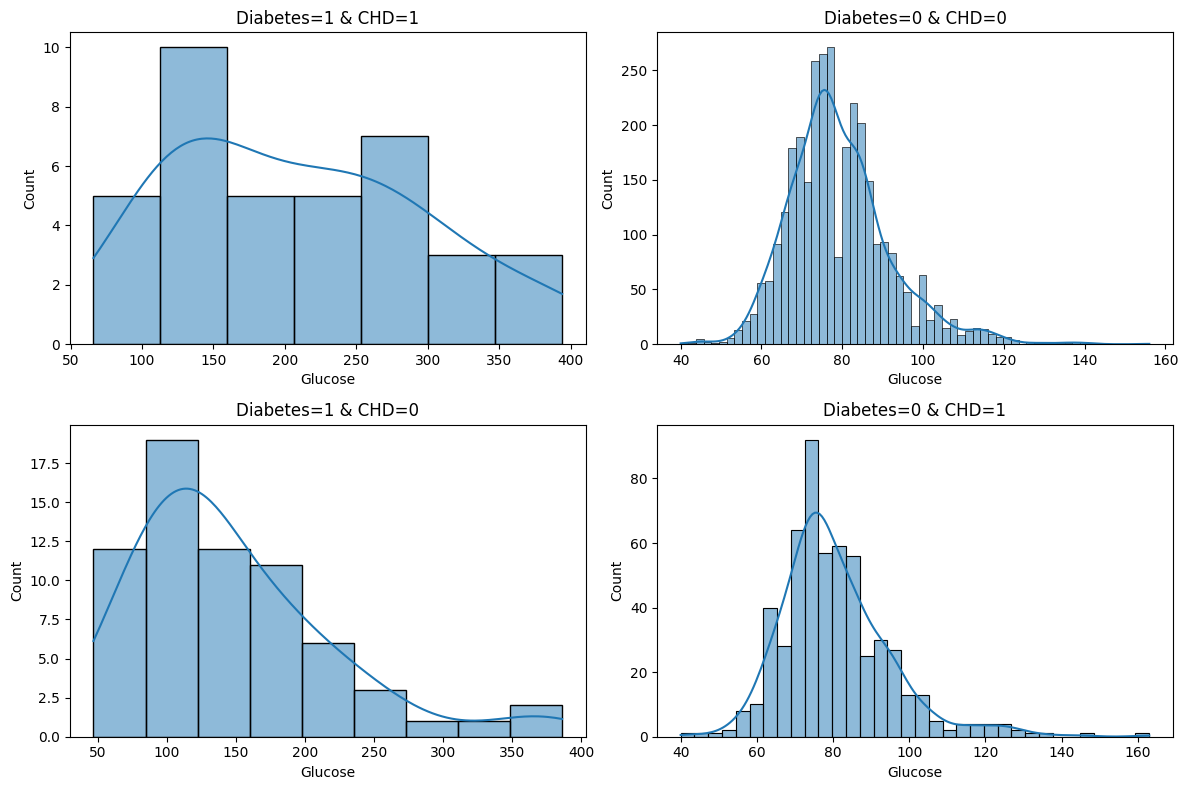

In [342]:
dfs_media = [
    media_diabete1_chd1,
    media_diabete0_chd0,
    media_diabete1_chd0,
    media_diabete0_chd1
]
titles = [
    'Diabetes=1 & CHD=1',
    'Diabetes=0 & CHD=0',
    'Diabetes=1 & CHD=0',
    'Diabetes=0 & CHD=1'
]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (df_media, title) in enumerate(zip(dfs_media, titles)):
    sns.histplot(df_media['glucose'], ax = axes[i], kde = True)
    axes[i].set_title(title)
    axes[i].set_xlabel('Glucose')

plt.tight_layout()
plt.show()

In [343]:
media_diabete1_chd1 = (media_diabete1_chd1['glucose'].median()).round(1)
media_diabete0_chd0 = (media_diabete0_chd0['glucose'].mean()).round(1)
media_diabete1_chd0 = (media_diabete1_chd0['glucose'].median()).round(1)
media_diabete0_chd1 = (media_diabete0_chd1['glucose'].mean()).round(1)

print(media_diabete1_chd1, media_diabete0_chd0, media_diabete1_chd0, media_diabete0_chd1)

for i in df[df['glucose'].isna()].index:
    diabete = df.at[df.index[i], 'diabetes']
    chd = df.at[df.index[i], 'TenYearCHD']

    if diabete == 1 and chd == 1:
        df.at[df.index[i], 'glucose'] =  media_diabete1_chd1
    elif diabete == 1 and chd == 0:
        df.at[df.index[i], 'glucose'] =  media_diabete0_chd0
    elif diabete == 0 and chd == 0:
        df.at[df.index[i], 'glucose'] =  media_diabete0_chd0
    elif diabete == 0 and chd == 1:
        df.at[df.index[i], 'glucose'] =  media_diabete0_chd1

206.0 79.3 126.0 80.7


In [344]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,79.3,0


In [345]:
print(df.isna().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64


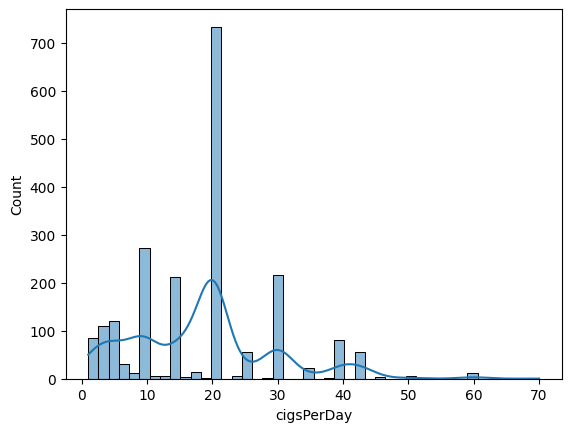

In [346]:
df_smoker = df[(df['currentSmoker'] == 1)]
sns.histplot(df_smoker, x = 'cigsPerDay', kde = True);

In [347]:
# print(df[(df['cigsPerDay'] == 0) & (df['BPMeds'] == 1)])
df_cigsperday_nan = df[(df['cigsPerDay'].isna())]
print(df_cigsperday_nan['currentSmoker'].unique()) # Para dados NaN na colunas cigsPerDay é referente somente fumantes.

[1]


In [348]:
df = df.dropna(subset = ['cigsPerDay', 'education']).reset_index(drop = True) # Mais indicado o dropna por ser um pequeno grupo de dados NaN
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4101,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4102,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4103,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4104,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,79.3,0


In [349]:
print(df.isna().sum())

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            49
sysBP               0
diaBP               0
BMI                18
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64


In [350]:
df_bpmeds = df[(df['BPMeds'].isna())]
df_bpmeds.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
47,1,36,3.0,1,20.0,NaN,0,1,0,194.0,139.0,93.0,24.33,80.0,62.0,0
74,0,44,3.0,1,20.0,NaN,0,0,0,213.0,115.0,72.5,21.16,80.0,89.0,0
187,1,45,3.0,1,40.0,NaN,0,0,0,278.0,135.0,84.0,23.79,75.0,79.0,1
238,1,46,1.0,1,30.0,NaN,0,1,0,253.0,147.0,85.0,30.62,100.0,75.0,0
304,0,39,2.0,0,0.0,NaN,0,0,0,242.0,113.0,85.0,25.54,85.0,104.0,0


In [351]:
print(df[(df['prevalentHyp'] == 0) & (df['BPMeds'] == 1)])

Empty DataFrame
Columns: [male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []


In [352]:
for index in df[(df['BPMeds'].isna()) & (df['prevalentHyp'] == 0)].index:

    df.at[df.index[index], 'BPMeds'] = 0
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4101,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4102,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4103,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4104,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,79.3,0


In [353]:
print(df.isna().sum())

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds             22
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            49
sysBP               0
diaBP               0
BMI                18
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64


In [354]:
print((df[(df['prevalentHyp'] == 1) & (df['TenYearCHD'] == 1) & (df['BPMeds'] == 1)]).shape)
print((df[(df['prevalentHyp'] == 1) & (df['TenYearCHD'] == 1) & (df['BPMeds'] == 0)]).shape)
print((df[(df['prevalentHyp'] == 1) & (df['TenYearCHD'] == 0) & (df['BPMeds'] == 0)]).shape)
print((df[(df['prevalentHyp'] == 1) & (df['TenYearCHD'] == 0) & (df['BPMeds'] == 1)]).shape)
# Não foi encontrado regras, e é um tiro no escuro tenta definir entre sim ou não, e muito arriscado, e como são poucos dados NaN (22), não pesa no modelo então podemos excluir

(41, 16)
(270, 16)
(866, 16)
(80, 16)


In [355]:
df = df.dropna(subset = ['BPMeds']).reset_index(drop = True)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4080,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4081,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4082,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,79.3,0


In [356]:
print(df.isna().sum())

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            49
sysBP               0
diaBP               0
BMI                18
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64


In [357]:
df.corr() # total de colesterol (totChol) e índice de massa corporal (BMI) possuem poucos dados, não possui relevancia no modelo e não possuem corr com nenhuma outra variável preditora para tentar tratar os dados NaN.

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.023304,0.014262,0.198314,0.320322,-0.051837,-0.001725,0.008896,0.019026,-0.068216,-0.031104,0.061028,0.080513,-0.117586,0.006508,0.088620
age,-0.023304,1.000000,-0.165252,-0.209425,-0.189382,0.125440,0.054870,0.305023,0.100086,0.267516,0.392046,0.208108,0.136974,-0.010288,0.112105,0.226549
education,0.014262,-0.165252,1.000000,0.017727,0.006860,-0.010605,-0.033017,-0.082183,-0.037681,-0.022378,-0.131870,-0.065760,-0.137643,-0.055882,-0.033465,-0.053694
currentSmoker,0.198314,-0.209425,0.017727,1.000000,0.770048,-0.047981,-0.030909,-0.103207,-0.039389,-0.046506,-0.127522,-0.107919,-0.166075,0.057353,-0.051074,0.020551
cigsPerDay,0.320322,-0.189382,0.006860,0.770048,1.000000,-0.046173,-0.031760,-0.067110,-0.034314,-0.024255,-0.087356,-0.054158,-0.090352,0.071577,-0.050544,0.056760
BPMeds,-0.051837,0.125440,-0.010605,-0.047981,-0.046173,1.000000,0.118820,0.262045,0.044609,0.084764,0.256714,0.195820,0.101269,0.017889,0.050374,0.091254
prevalentStroke,-0.001725,0.054870,-0.033017,-0.030909,-0.031760,0.118820,1.000000,0.073660,0.007752,-0.003407,0.058190,0.052691,0.031060,-0.013710,0.010166,0.056838
prevalentHyp,0.008896,0.305023,-0.082183,-0.103207,-0.067110,0.262045,0.073660,1.000000,0.076026,0.164276,0.695359,0.617403,0.302005,0.150281,0.085724,0.178227
diabetes,0.019026,0.100086,-0.037681,-0.039389,-0.034314,0.044609,0.007752,0.076026,1.000000,0.043264,0.107492,0.051020,0.083305,0.047332,0.619594,0.095283
totChol,-0.068216,0.267516,-0.022378,-0.046506,-0.024255,0.084764,-0.003407,0.164276,0.043264,1.000000,0.212971,0.170936,0.120059,0.088010,0.047759,0.081679


In [358]:
df = df.dropna(subset = ['totChol', 'BMI']).reset_index(drop = True)
df ### 400 linhas a mais que no modelo_v1, um aumento de ~10% na dataset.

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4014,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4015,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4016,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,79.3,0


In [359]:
x = df.drop(columns = ['TenYearCHD'])
y = df['TenYearCHD']

In [360]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(3214, 15) (804, 15) (3214,) (804,)


In [361]:
clf = LogisticRegression()
clf.fit(x_treino, y_treino)

c:\Users\marce\OneDrive\Documentos\Varos\DEV_Christian\ml_\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [362]:
coef_df = pd.DataFrame(clf.coef_[0], index = x.columns, columns = ['Coeficientes'])
coef_df

,Coeficientes
male,0.108685
age,0.026652
education,-0.325813
currentSmoker,-0.060137
cigsPerDay,0.020023
BPMeds,0.028638
prevalentStroke,0.009834
prevalentHyp,0.231162
diabetes,0.038586
totChol,-0.002525


In [363]:
score_treinamento = clf.score(x_treino, y_treino)
score_teste = clf.score(x_teste, y_teste)
print(score_treinamento, score_teste)

0.8522090852520224 0.8532338308457711


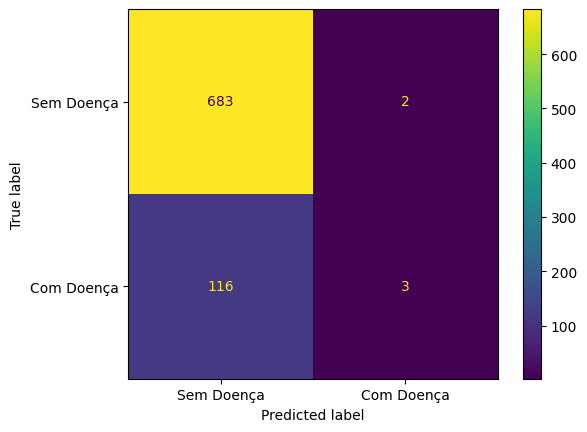

In [364]:
y_pred = clf.predict(x_teste)
cm = confusion_matrix(y_teste, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Sem Doença', 'Com Doença'])
display.plot();

# Falso Positivo (FP): 2
# Falso Negativo (FN): 116
# Verdadeiro Positivo (VP): 3
# Verdadeiro Negativo (VN): 683

In [365]:
clf_report = classification_report(y_teste, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       685
           1       0.60      0.03      0.05       119

    accuracy                           0.85       804
   macro avg       0.73      0.51      0.48       804
weighted avg       0.82      0.85      0.79       804



In [366]:
recall = recall_score(y_teste, y_pred)
print(recall)
f1 = f1_score(y_teste, y_pred)
print(f1)

0.025210084033613446
0.04838709677419355


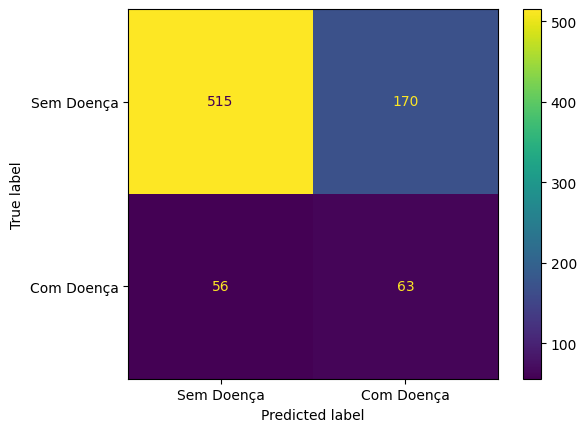

In [367]:
# Passo 1: Pegar as probabilidades da classe positiva
y_probs = clf.predict_proba(x_teste)[:, 1]

# Passo 2: Definir threshold (exemplo: 0.3)
threshold = 0.18
y_pred2 = (y_probs >= threshold).astype(int)

# Passo 3: Matriz de confusão com novo threshold
cm = confusion_matrix(y_teste, y_pred2)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sem Doença', 'Com Doença'])
display.plot();

In [368]:
clf_report = classification_report(y_teste, y_pred2)
print(clf_report)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       685
           1       0.27      0.53      0.36       119

    accuracy                           0.72       804
   macro avg       0.59      0.64      0.59       804
weighted avg       0.81      0.72      0.75       804



In [369]:
recall = recall_score(y_teste, y_pred2)
print(recall)
f1 = f1_score(y_teste, y_pred2)
print(f1)

0.5294117647058824
0.35795454545454547


In [370]:
fpr, tpr, threshold_ = roc_curve(y_teste, y_probs)
pontuacao_auc = roc_auc_score(y_teste, y_pred2)
print(pontuacao_auc)

0.6406182911120653


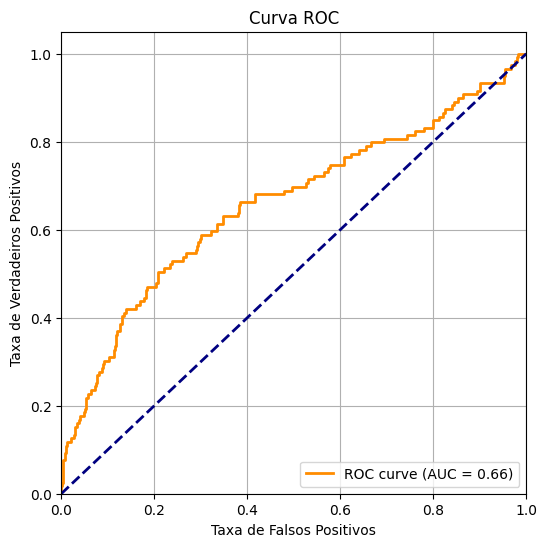

In [ ]:
fpr, tpr, threshold_ = roc_curve(y_teste, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # linha aleatória
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [372]:
def plot_roc_curve(y, y_predito):
    fpr, tpr, threshold_ = roc_curve(y, y_predito)
    plt.plot(fpr, tpr)
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')

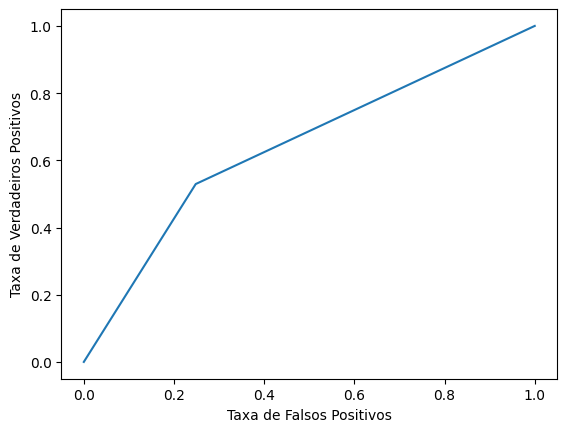

In [373]:
plot_roc_curve(y_teste, y_pred2)